## IMPORTS

In [1]:
import pandas as pd, numpy as np
%matplotlib inline
from pycaret.classification import *
from pycaret.utils import check_metric
from pathlib import Path

## GLOBAL PATH VARIABLES

In [2]:
# Notebook folder
NB_DIR = %pwd
NB_DIR = Path(NB_DIR)

# Root MCI foler
ROOT_DIR = NB_DIR.parent

# Main data folder (with downloaded csv files)
MAIN_DATA_DIR = ROOT_DIR/'data'
DATA_DIR_FS = ROOT_DIR / 'data_FS'

# Current data dir with sMCI_cAD.csv & bl.csv files
CURRENT_DATA_DIR = ROOT_DIR/'results'

# Results folder
RESULTS_DIR = ROOT_DIR/'results' #misclassified patient table
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

## IMOPRTS TO CREATE CONFUSION MATRIX 

In [3]:
from pathlib import Path
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/modules")

In [4]:
# Importing packages needed
import mci_rf_bl as mrfbl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

## LOAD DATA

In [5]:
#setting to displaying all columns in pandas df
pd.set_option("display.max_columns", None)

In [6]:
# Data generated in RandomForest-notebook
dataset = pd.read_csv(RESULTS_DIR /'2.0-random_forest_train_test.csv', index_col=0)

In [7]:
data = dataset.loc[dataset.Usage_=='train']
data_unseen = dataset.loc[dataset.Usage_=='test']

In [8]:
data_unseen.head()

,AGE,RAVLT_immediate,AVDEL30MIN_neuro,AVDELTOT_neuro,TRAASCOR_neuro,TRABSCOR_neuro,CATANIMSC_neuro,GDTOTAL_gds,ANARTERR_neuro,LRHHC_n_long,Apoe4_,Subgroup_,Subgroup_num_,Usage_,PTGENDER,Gender_num_
6,80.4,30.0,1.0,7.0,49.0,168.0,13.0,0.0,17.0,0.003638,0.0,sMCI,0,test,Female,1
82,77.3,29.0,0.0,11.0,122.0,151.0,17.0,2.0,3.0,0.003343,1.0,cAD,1,test,Male,0
184,77.5,35.0,1.0,10.0,27.0,69.0,24.0,2.0,22.0,0.003149,1.0,cAD,1,test,Female,1
359,71.1,24.0,0.0,2.0,50.0,85.0,13.0,2.0,7.0,0.003729,0.0,cAD,1,test,Female,1
384,83.6,30.0,2.0,9.0,22.0,76.0,18.0,0.0,9.0,0.003700,0.0,cAD,1,test,Female,1


In [9]:
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (539, 16)
Unseen Data For Predictions: (139, 16)


## Load PyCaret model created in `3.0-pycaret_pipeline`-notebook

Denne modellen er den vi ikke har pipelinen til....

In [13]:
ensemble_model = load_model(RESULTS_DIR /'3.0-251121_best_blended_accuracy_top5')

Transformation Pipeline and Model Successfully Loaded


In [14]:
ensemble_model

Pipeline(steps=[('dtypes',
                 DataTypes_Auto_infer(features_todrop=['Subgroup_', 'fold_nb',
                                                       'Usage_', 'PTGENDER'],
                                      ml_usecase='classification',
                                      target='Subgroup_num_')),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagor...
                                                                 random_state=1138)),
                                              ('Bagging_2',
                                               BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(),
                                  

# Using this model to predict on unseen test set

In [15]:
preds_ensemble = predict_model(ensemble_model, data=data_unseen)

In [16]:
preds_ensemble.head()

,AGE,RAVLT_immediate,AVDEL30MIN_neuro,AVDELTOT_neuro,TRAASCOR_neuro,TRABSCOR_neuro,CATANIMSC_neuro,GDTOTAL_gds,ANARTERR_neuro,LRHHC_n_long,Apoe4_,Subgroup_,Subgroup_num_,Usage_,PTGENDER,Gender_num_,Label,Score
6,80.4,30.0,1.0,7.0,49.0,168.0,13.0,0.0,17.0,0.003638,0.0,sMCI,0,test,Female,1,1,0.5957
82,77.3,29.0,0.0,11.0,122.0,151.0,17.0,2.0,3.0,0.003343,1.0,cAD,1,test,Male,0,1,0.7635
184,77.5,35.0,1.0,10.0,27.0,69.0,24.0,2.0,22.0,0.003149,1.0,cAD,1,test,Female,1,1,0.5913
359,71.1,24.0,0.0,2.0,50.0,85.0,13.0,2.0,7.0,0.003729,0.0,cAD,1,test,Female,1,1,0.7076
384,83.6,30.0,2.0,9.0,22.0,76.0,18.0,0.0,9.0,0.003700,0.0,cAD,1,test,Female,1,0,0.5337


In [17]:
check_metric(preds_ensemble['Subgroup_num_'], preds_ensemble['Label'], metric = 'Accuracy')

0.6835

# Interpret results

## Finn tp, fp, fn, tn

In [18]:
data_unseen.head()

,AGE,RAVLT_immediate,AVDEL30MIN_neuro,AVDELTOT_neuro,TRAASCOR_neuro,TRABSCOR_neuro,CATANIMSC_neuro,GDTOTAL_gds,ANARTERR_neuro,LRHHC_n_long,Apoe4_,Subgroup_,Subgroup_num_,Usage_,PTGENDER,Gender_num_
6,80.4,30.0,1.0,7.0,49.0,168.0,13.0,0.0,17.0,0.003638,0.0,sMCI,0,test,Female,1
82,77.3,29.0,0.0,11.0,122.0,151.0,17.0,2.0,3.0,0.003343,1.0,cAD,1,test,Male,0
184,77.5,35.0,1.0,10.0,27.0,69.0,24.0,2.0,22.0,0.003149,1.0,cAD,1,test,Female,1
359,71.1,24.0,0.0,2.0,50.0,85.0,13.0,2.0,7.0,0.003729,0.0,cAD,1,test,Female,1
384,83.6,30.0,2.0,9.0,22.0,76.0,18.0,0.0,9.0,0.003700,0.0,cAD,1,test,Female,1


In [19]:
preds_ensemble.head()

,AGE,RAVLT_immediate,AVDEL30MIN_neuro,AVDELTOT_neuro,TRAASCOR_neuro,TRABSCOR_neuro,CATANIMSC_neuro,GDTOTAL_gds,ANARTERR_neuro,LRHHC_n_long,Apoe4_,Subgroup_,Subgroup_num_,Usage_,PTGENDER,Gender_num_,Label,Score
6,80.4,30.0,1.0,7.0,49.0,168.0,13.0,0.0,17.0,0.003638,0.0,sMCI,0,test,Female,1,1,0.5957
82,77.3,29.0,0.0,11.0,122.0,151.0,17.0,2.0,3.0,0.003343,1.0,cAD,1,test,Male,0,1,0.7635
184,77.5,35.0,1.0,10.0,27.0,69.0,24.0,2.0,22.0,0.003149,1.0,cAD,1,test,Female,1,1,0.5913
359,71.1,24.0,0.0,2.0,50.0,85.0,13.0,2.0,7.0,0.003729,0.0,cAD,1,test,Female,1,1,0.7076
384,83.6,30.0,2.0,9.0,22.0,76.0,18.0,0.0,9.0,0.003700,0.0,cAD,1,test,Female,1,0,0.5337


### Adding column `Ens_pred` for further comparison with predictions from Random Forest model (below)

In [20]:
preds_ensemble['Ens_pred'] = "" 

for i in preds_ensemble.index:
    
    if preds_ensemble.loc[i,'Ens_pred'] == "":

        if preds_ensemble.loc[i, 'Subgroup_'] == 'sMCI' and preds_ensemble.loc[i, 'Label'] == 0:
            preds_ensemble.loc[i, 'Ens_pred'] = 'TN_'

        elif preds_ensemble.loc[i, 'Subgroup_'] == 'sMCI' and preds_ensemble.loc[i, 'Label'] == 1:
            preds_ensemble.loc[i, 'Ens_pred'] ='FP_' 

        elif preds_ensemble.loc[i, 'Subgroup_'] == 'cAD' and preds_ensemble.loc[i, 'Label'] == 0:
            preds_ensemble.loc[i, 'Ens_pred'] = 'FN_' 

        elif preds_ensemble.loc[i, 'Subgroup_'] == 'cAD' and preds_ensemble.loc[i, 'Label'] == 1:
            preds_ensemble.loc[i, 'Ens_pred'] ='TP_' 

In [21]:
# Visual inspection for minimum one of each prediction (aka TN_, FP_ FN_ & TP_)
# If 'Subgroup_' == 'sMCI' and 'Label' == 1, then 'Ens_pred' should be 'FP_'
preds_ensemble.head(20)

,AGE,RAVLT_immediate,AVDEL30MIN_neuro,AVDELTOT_neuro,TRAASCOR_neuro,TRABSCOR_neuro,CATANIMSC_neuro,GDTOTAL_gds,ANARTERR_neuro,LRHHC_n_long,Apoe4_,Subgroup_,Subgroup_num_,Usage_,PTGENDER,Gender_num_,Label,Score,Ens_pred
6,80.4,30.0,1.0,7.0,49.0,168.0,13.0,0.0,17.0,0.003638,0.0,sMCI,0,test,Female,1,1,0.5957,FP_
82,77.3,29.0,0.0,11.0,122.0,151.0,17.0,2.0,3.0,0.003343,1.0,cAD,1,test,Male,0,1,0.7635,TP_
184,77.5,35.0,1.0,10.0,27.0,69.0,24.0,2.0,22.0,0.003149,1.0,cAD,1,test,Female,1,1,0.5913,TP_
359,71.1,24.0,0.0,2.0,50.0,85.0,13.0,2.0,7.0,0.003729,0.0,cAD,1,test,Female,1,1,0.7076,TP_
384,83.6,30.0,2.0,9.0,22.0,76.0,18.0,0.0,9.0,0.003700,0.0,cAD,1,test,Female,1,0,0.5337,FN_
398,85.9,26.0,1.0,13.0,37.0,75.0,12.0,0.0,4.0,0.003276,0.0,cAD,1,test,Male,0,1,0.5716,TP_
421,79.6,46.0,3.0,13.0,21.0,71.0,22.0,1.0,8.0,0.003893,1.0,cAD,1,test,Female,1,0,0.5979,FN_
694,78.8,26.0,0.0,10.0,28.0,80.0,17.0,0.0,32.0,0.003149,1.0,cAD,1,test,Male,0,1,0.6196,TP_
739,70.5,31.0,0.0,11.0,33.0,76.0,16.0,0.0,5.0,0.003482,1.0,cAD,1,test,Female,1,1,0.7780,TP_
793,71.2,31.0,3.0,11.0,71.0,109.0,12.0,3.0,19.0,0.003817,1.0,cAD,1,test,Male,0,1,0.5852,TP_


## Inspection of predictions

In [22]:
# Positive and negative predictions
p = preds_ensemble.loc[preds_ensemble.Label == 1]
n = preds_ensemble.loc[preds_ensemble.Label == 0]

In [23]:
p.head()

,AGE,RAVLT_immediate,AVDEL30MIN_neuro,AVDELTOT_neuro,TRAASCOR_neuro,TRABSCOR_neuro,CATANIMSC_neuro,GDTOTAL_gds,ANARTERR_neuro,LRHHC_n_long,Apoe4_,Subgroup_,Subgroup_num_,Usage_,PTGENDER,Gender_num_,Label,Score,Ens_pred
6,80.4,30.0,1.0,7.0,49.0,168.0,13.0,0.0,17.0,0.003638,0.0,sMCI,0,test,Female,1,1,0.5957,FP_
82,77.3,29.0,0.0,11.0,122.0,151.0,17.0,2.0,3.0,0.003343,1.0,cAD,1,test,Male,0,1,0.7635,TP_
184,77.5,35.0,1.0,10.0,27.0,69.0,24.0,2.0,22.0,0.003149,1.0,cAD,1,test,Female,1,1,0.5913,TP_
359,71.1,24.0,0.0,2.0,50.0,85.0,13.0,2.0,7.0,0.003729,0.0,cAD,1,test,Female,1,1,0.7076,TP_
398,85.9,26.0,1.0,13.0,37.0,75.0,12.0,0.0,4.0,0.003276,0.0,cAD,1,test,Male,0,1,0.5716,TP_


In [24]:
n.head()

,AGE,RAVLT_immediate,AVDEL30MIN_neuro,AVDELTOT_neuro,TRAASCOR_neuro,TRABSCOR_neuro,CATANIMSC_neuro,GDTOTAL_gds,ANARTERR_neuro,LRHHC_n_long,Apoe4_,Subgroup_,Subgroup_num_,Usage_,PTGENDER,Gender_num_,Label,Score,Ens_pred
384,83.6,30.0,2.0,9.0,22.0,76.0,18.0,0.0,9.0,0.003700,0.0,cAD,1,test,Female,1,0,0.5337,FN_
421,79.6,46.0,3.0,13.0,21.0,71.0,22.0,1.0,8.0,0.003893,1.0,cAD,1,test,Female,1,0,0.5979,FN_
834,63.9,39.0,4.0,12.0,24.0,66.0,14.0,1.0,15.0,0.003856,1.0,sMCI,0,test,Male,0,0,0.5716,TN_
892,62.7,23.0,0.0,6.0,22.0,78.0,13.0,1.0,18.0,0.004711,0.0,cAD,1,test,Male,0,0,0.5302,FN_
899,71.7,34.0,4.0,9.0,29.0,52.0,19.0,1.0,0.0,0.004150,1.0,cAD,1,test,Male,0,0,0.5009,FN_


In [25]:
tn = len(preds_ensemble.loc[preds_ensemble['Ens_pred'] == 'TN_'])
fp = len(preds_ensemble.loc[preds_ensemble['Ens_pred'] == 'FP_'])
fn = len(preds_ensemble.loc[preds_ensemble['Ens_pred'] == 'FN_'])
tp = len(preds_ensemble.loc[preds_ensemble['Ens_pred'] == 'TP_'])

In [26]:
# Misclassification FP + FN / TP + TN + FP + FN
misclass_perc = (fp + fn) / (tp + tn + fp + fn)
print(f"Percentage of test set misclassified: {misclass_perc}%")

Percentage of test set misclassified: 0.31654676258992803%


In [27]:
# Accuracy (TP + TN) / (TP + TN + FP + FN)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracyen for classification on test set: {accuracy}")

Accuracyen for classification on test set: 0.6834532374100719


In [28]:
# Precision TP / TP + FP
precision = tp / (tp + fp)
print(precision)

0.6721311475409836


In [29]:
# Sensitivity aka Recall (true positives / all actual positives) = TP / TP + FN
recall = tp / (tp + fn)
print(recall)

0.6307692307692307


In [30]:
# Sensitivity TP / (TP + FN)
sensitivity = tp / (tp + fn)
print(sensitivity)

0.6307692307692307


In [31]:
# Specificity (true negatives / all actual negatives) = TN / TN + FP
specificity = tn / (tn + fp)
print(specificity)

0.7297297297297297


# Creating confusion matrix for Ensemble's prediction

In [32]:
# Prepareing 'y_true' from ensemble's prediction --> ground truth
y_test = preds_ensemble.Subgroup_num_
y_test.head()

6      0
82     1
184    1
359    1
384    1
Name: Subgroup_num_, dtype: int64

In [33]:
# Preparing y_test_pred from ensemble --> 'Label' column
y_test_pred = preds_ensemble.Label
y_test_pred.head()

6      1
82     1
184    1
359    1
384    0
Name: Label, dtype: int64

In [34]:
# Ploting confusion matrix for test set 
conf_matrix_test_ens  = metrics.confusion_matrix(y_test, y_test_pred)
conf_matrix_test_ens

array([[54, 20],
       [24, 41]])

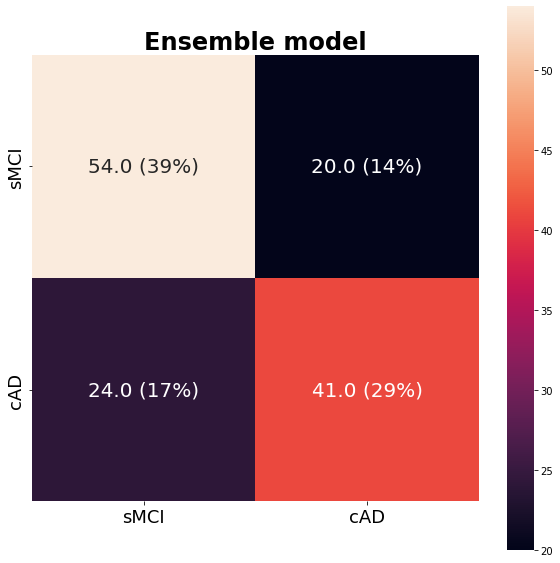

In [35]:
# Mean of test confusion matix 
# conf_mat_mean = conf_matrix_test_ens.mean(axis=0)
# percantage values of confusion matix according to validatin set lenght

conf_matrix_test_prc = conf_matrix_test_ens / y_test.shape[0] * 100

conf_mat_ens = mrfbl.plot_confusion_matrix_TEST_IR(conf_matrix_test_ens, conf_matrix_test_prc,
                                    file_name_number="K50", title="Ensemble model",
                                    file_name_prefix="3.1-ensemble-conf-matrix",
                                    save=True, results_dir=RESULTS_DIR/'figs')

---

## Load data with predictions from Random Forest for further comparison. 
### File: `results/RandomForest-CV50-predictions.csv`
Loading data frame containing information about the Random Forest model's classification on test set. 

Prediction (i.e TN, FP, FN or TP) is specified by `CM_pred_`-column.

In [36]:
rf_pred = pd.read_csv(RESULTS_DIR / '2.0-random_forest-TEST-predictions.csv', index_col=0)

In [37]:
rf_pred.shape

(139, 137)

In [38]:
rf_pred.head()

,RID,PTID,PTGENDER,PTEDUCAT,EXAMDATE,AGE,Years_bl,Month,Month_bl,DX,DX_bl,ORIGPROT,Phase,IMAGEUID,ABETA,ADAS13_adni,APOE4,CDRSB,EXAMDATE_faq,FAQ,FAQBEVG_faq,FAQEVENT_faq,FAQFINAN_faq,FAQFORM_faq,FAQGAME_faq,FAQMEAL_faq,FAQREM_faq,FAQSHOP_faq,FAQSOURCE_faq,FAQTOTAL_faq,FAQTRAVL_faq,FAQTV_faq,LDELTOTAL,MERGE_long_faq,MMSE,PTAU,PTETHCAT,PTRACCAT,Phase_faq,RAVLT_forgetting,RAVLT_immediate,RAVLT_learning,RAVLT_perc_forgetting,RID_faq,TAU,TRABSCOR_adni,VISCODE2_faq,MERGE_long_adas,Q10_adas,Q11_adas,Q12_adas,Q13_adas,Q1_adas,Q2_adas,Q3_adas,Q4_adas,Q5_adas,Q6_adas,Q7_adas,Q8_adas,Q9_adas,TOTAL13_adas,VISCODE3_adas,ANARTERR_neuro,AVDEL30MIN_neuro,AVDELTOT_neuro,AVTOT6_neuro,AVTOTB_neuro,CATANIMSC_neuro,CLOCKSCOR_neuro,COPYSCOR_neuro,EXAMDATE_neuro,MERGE_long_neuro,Phase_neuro,TRAASCOR_neuro,TRABSCOR_neuro,VISCODE2_neuro,EXAMDATE_gds,GDTOTAL_gds,MERGE_long_gds,Phase_gds,VISCODE2_gds,LHHC_long,LLV_long,LRHHC_long,LRHHC_n_long,LRLV_long,LRLV_n_long,RHHC_long,RLV_long,complete_long,eTIV_long,LHHC_cross,LLV_cross,LRHHC_cross,LRHHC_n_cross,LRLV_cross,LRLV_n_cross,RHHC_cross,RLV_cross,complete_cross,eTIV_cross,ADAS13_adni_Nr_,Abeta_,Age_at_scan_,Age_at_scan_rounded_,Age_bin_,Age_rounded_,Apoe4_,FAQBEVG_faq_cod_,FAQEVENT_faq_cod_,FAQFINAN_faq_cod_,FAQFORM_faq_cod_,FAQGAME_faq_cod_,FAQMEAL_faq_cod_,FAQREM_faq_cod_,FAQSHOP_faq_cod_,FAQTRAVL_faq_cod_,FAQTV_faq_cod_,Faq_cnts_,Faq_dsc_,Gender_num_,Idx_,Imageuid_,MERGE_FS_,MRIs_Nr_,Participation_length_yr_,Subgroup_,Subgroup_num_,TOTAL13_adas_Nr_,Usage_,VISCODE3_,Visits_Nr_,y_true_,y_pred_,CM_pred_,MERGE_predictions_
6,6,100_S_0006,Female,13,2005-11-29,80.4,0.0,0,0.0,MCI,LMCI,ADNI1,ADNI1,33025.0,NaN,25.67,0.0,0.5,2005-11-29,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,both,25.0,NaN,Not Hisp/Latino,White,ADNI1,5.0,30.0,1.0,83.3333,6.0,NaN,168.0,bl,both,0.0,0.0,0.0,0.0,5.67,0.0,1.0,7.0,0.0,0.0,0.0,12.0,0.0,25.67,bl,17.0,1.0,7.0,4.0,4.0,13.0,4.0,4.0,2005-11-29,both,ADNI1,49.0,168.0,bl,2005-11-07,0.0,both,ADNI1,bl,2770.6,21315.9,5463.2,0.003638,40422.5,0.026915,2692.6,19106.6,True,1.501874e+06,3011.6,21544.1,5810.4,0.003900,40321.5,0.027066,2798.8,18777.4,True,1.489743e+06,6,NaN,80.4,80,(70-80],80,0.0,0,0,0,0,0,0,0,0,0,0,0,N,1,34,I33025,both,5,3.02533,sMCI,0,6,test,bl,7,sMCI,cAD,FP,both
82,57,018_S_0057,Male,20,2006-01-06,77.3,0.0,0,0.0,MCI,LMCI,ADNI1,ADNI1,118828.0,597.1,19.67,1.0,1.5,2006-01-12,7.0,0.0,0.0,3.0,4.0,3.0,1.0,3.0,0.0,2.0,7.0,3.0,3.0,3.0,both,27.0,30.25,Not Hisp/Latino,White,ADNI1,8.0,29.0,6.0,100.0000,57.0,294.1,151.0,bl,both,0.0,1.0,1.0,1.0,5.67,0.0,1.0,3.0,0.0,0.0,1.0,6.0,0.0,19.67,bl,3.0,0.0,11.0,0.0,1.0,17.0,3.0,5.0,2006-01-06,both,ADNI1,122.0,151.0,bl,2005-11-08,2.0,both,ADNI1,bl,3135.3,74894.6,6273.9,0.003343,142969.3,0.076179,3138.6,68074.7,True,1.876743e+06,3542.9,73582.5,6655.7,0.003539,139657.7,0.074262,3112.8,66075.2,True,1.880605e+06,5,597.1,77.3,77,(70-80],77,1.0,0,0,1,2,1,0,1,0,1,1,0,N,0,328,I118828,both,5,3.23888,cAD,1,5,test,bl,7,cAD,cAD,TP,both
184,126,023_S_0126,Female,14,2006-02-16,77.5,0.0,0,0.0,MCI,LMCI,ADNI1,ADNI1,118973.0,536.8,14.67,1.0,1.0,2006-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,both,25.0,24.94,Not Hisp/Latino,White,ADNI1,7.0,35.0,3.0,87.5000,126.0,256.3,69.0,bl,both,0.0,0.0,0.0,0.0,3.67,0.0,0.0,5.0,0.0,0.0,1.0,5.0,0.0,14.67,bl,22.0,1.0,10.0,4.0,4.0,24.0,5.0,5.0,2006-02-16,both,ADNI1,27.0,69.0,bl,2006-01-05,2.0,both,ADNI1,bl,2466.3,22216.8,4663.0,0.003149,34975.0,0.023619,2196.7,12758.2,True,1.480821e+06,2684.3,22441.6,5158.5,0.003513,35535.3,0.024200,2474.2,13093.7,True,1.468429e+06,13,536.8,77.5,78,(70-80],78,1.0,0,0,0,0,0,0,0,0,0,0,0,N,1,821,I118973,both,9,10.10270,cAD,1,13,test,bl,19,cAD,cAD,TP,both
359,204,035_S_0204,Female,16,2006-02-23,71.1,0.0,0,0.0,MCI,LMCI,ADNI1,ADNI1,39542.0,282.9,18.33,0.0,1.5,2006-02-22,3.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,2.0,3.0,0.0,0.0,2.0,both,25.0,20.29,Not Hisp/Latino,White,ADNI1,6.0,24.0,3.0,100.0000,204.0,188.6,85.0,bl,both,0.0,1.0,0.0,1.0,5.33,0.0,0.0,7.0,0.0,0.0,0.0,4.0,0.0,18.33,bl,7.0,

In [39]:
# Restrict to features needed for further analysis, all meta data is in 'Preds_ensemble'-file
rf_pred = rf_pred[["CM_pred_"]]

In [40]:
rf_pred.head()

,CM_pred_
6,FP
82,TP
184,TP
359,TP
384,TP


In [41]:
# Shape of new file should be 139x141 because we add 'Label' og 'Ensemble_pred', mens Subgruop_ finnes fra før
final_df = pd.concat([rf_pred, preds_ensemble], axis=1)
final_df.shape

(139, 20)

In [42]:
final_df.head()

,CM_pred_,AGE,RAVLT_immediate,AVDEL30MIN_neuro,AVDELTOT_neuro,TRAASCOR_neuro,TRABSCOR_neuro,CATANIMSC_neuro,GDTOTAL_gds,ANARTERR_neuro,LRHHC_n_long,Apoe4_,Subgroup_,Subgroup_num_,Usage_,PTGENDER,Gender_num_,Label,Score,Ens_pred
6,FP,80.4,30.0,1.0,7.0,49.0,168.0,13.0,0.0,17.0,0.003638,0.0,sMCI,0,test,Female,1,1,0.5957,FP_
82,TP,77.3,29.0,0.0,11.0,122.0,151.0,17.0,2.0,3.0,0.003343,1.0,cAD,1,test,Male,0,1,0.7635,TP_
184,TP,77.5,35.0,1.0,10.0,27.0,69.0,24.0,2.0,22.0,0.003149,1.0,cAD,1,test,Female,1,1,0.5913,TP_
359,TP,71.1,24.0,0.0,2.0,50.0,85.0,13.0,2.0,7.0,0.003729,0.0,cAD,1,test,Female,1,1,0.7076,TP_
384,TP,83.6,30.0,2.0,9.0,22.0,76.0,18.0,0.0,9.0,0.003700,0.0,cAD,1,test,Female,1,0,0.5337,FN_


In [43]:
final_df.to_csv( RESULTS_DIR / '3.1-random_forest_n_ensemble_predictions.csv')

In [44]:
# Checking confusion matrix from Random Forest prediction
TN_teller = 0
FP_teller = 0
FN_teller = 0
TP_teller = 0

for i in final_df.index:
    if final_df.loc[i,'CM_pred_'] == 'TN':
        TN_teller += 1
    elif final_df.loc[i,'CM_pred_'] == 'FP':
        FP_teller += 1
    elif final_df.loc[i,'CM_pred_'] == 'FN':
        FN_teller += 1
    elif final_df.loc[i,'CM_pred_'] == 'TP':
        TP_teller += 1
        
print(f"Classification labels from Random Forest prediction on test set:") 
print(f"True Negatives: {TN_teller}")
print(f"False Positives: {FP_teller}")
print(f"False Negatives: {FN_teller}")
print(f"True Positives: {TP_teller}")

Classification labels from Random Forest prediction on test set:
True Negatives: 52
False Positives: 22
False Negatives: 25
True Positives: 40


In [45]:
# Checking confusion matrix from ENSEMBLE prediction
tn_teller = 0
fp_teller = 0
fn_teller = 0
tp_teller = 0

for i in final_df.index:
    if final_df.loc[i,'Ens_pred'] == 'TN_':
        tn_teller += 1
    elif final_df.loc[i,'Ens_pred'] == 'FP_':
        fp_teller += 1
    elif final_df.loc[i,'Ens_pred'] == 'FN_':
        fn_teller += 1
    elif final_df.loc[i,'Ens_pred'] == 'TP_':
        tp_teller += 1
        
print(f"Classification labels from ensemble model on test set:") 
print(f"True Negatives: {tn_teller}")
print(f"False Positives: {fp_teller}")
print(f"False Negatives: {fn_teller}")
print(f"True Positives: {tp_teller}")

Classification labels from ensemble model on test set:
True Negatives: 54
False Positives: 20
False Negatives: 24
True Positives: 41


# Investigating the two models' overlap in misclassfications of **sMCI**

In [46]:
fp_overlap = 0 
for i in final_df.index:
    if final_df.loc[i,'Ens_pred'] == 'FP_' and final_df.loc[i,'CM_pred_'] == 'FP':
        fp_overlap += 1
        
print("*"*90)
print(f"Random Forest: misclassified {FP_teller} sMCI subjects as cAD.")
print(f"Ensemblet: misclassified {fp_teller} sMCI subjects as converters.")
print()
print(f"Of these misclassifications the models overlapped {fp_overlap} deltagere.")
print("*"*90)

******************************************************************************************
Random Forest: misclassified 22 sMCI subjects as cAD.
Ensemblet: misclassified 20 sMCI subjects as converters.

Of these misclassifications the models overlapped 18 deltagere.
******************************************************************************************


### Identifying indexes for FP subjects where the models did not overlap  (sMCI --> FP)

In [47]:
# Misclassified as sMCI by the Ensemble and correctly classified by the Random Forest
indeksList_fp_ensemble = []

for i in final_df.index:
    if final_df.loc[i,'Ens_pred'] == 'FP_' and final_df.loc[i,'CM_pred_'] == 'TN':
        indeksList_fp_ensemble.append(i)
        
print("*"*100)      
print(f"Subjects with the {len(indeksList_fp_ensemble)} following indices {indeksList_fp_ensemble} were correctly")
print("classified by the RF and missclassified by the ensemble")
print("*"*100)

****************************************************************************************************
Subjects with the 2 following indices [5565, 6309] were correctly
classified by the RF and missclassified by the ensemble
****************************************************************************************************


In [48]:
# Misclassified as sMCI by the Random Forest and correctly by the Ensemble
indeksList_fp_rf = []
for i in final_df.index:
    if final_df.loc[i,'Ens_pred'] == 'TN_' and final_df.loc[i,'CM_pred_'] == 'FP':
        indeksList_fp_rf.append(i)
        
print("*"*100)
print(f"Subjects with the {len(indeksList_fp_rf)} following indices {indeksList_fp_rf} were correctly")
print("classified by the ensemble and miscassified by the Random Forest")
print("*"*100)

****************************************************************************************************
Subjects with the 4 following indices [1203, 2001, 2567, 4989] were correctly
classified by the ensemble and miscassified by the Random Forest
****************************************************************************************************


# Investigating the two models' overlap i misclassfications of **cAD**

In [49]:
fn_overlap = 0 

for i in final_df.index:
    if final_df.loc[i,'Ens_pred'] == 'FN_' and final_df.loc[i,'CM_pred_'] == 'FN':
        fn_overlap += 1
        
print("*"*90)
print(f"Random Forest: misclassified {FN_teller} cAD subjects as stabile.")
print(f"Ensemblet: misclassified {fn_teller} cAD as stabile.")
print()
print(f"Of these misclassifications, the models overlapped on {fn_overlap} subjects.")
print("*"*90)

******************************************************************************************
Random Forest: misclassified 25 cAD subjects as stabile.
Ensemblet: misclassified 24 cAD as stabile.

Of these misclassifications, the models overlapped on 20 subjects.
******************************************************************************************


### Identifying indexes for FP subjects where the models did not overlap (cAD --> FN)

In [50]:
# Subjects misclassified as FN by ensemble, and correctly classified as TP by the random forest:
indeksList_fn_ensemble = []
for i in final_df.index:
    if final_df.loc[i,'Ens_pred'] == 'FN_' and final_df.loc[i,'CM_pred_'] == 'TP':
        indeksList_fn_ensemble.append(i)
        
print("*"*100)

print(f"Subjects with the {len(indeksList_fn_ensemble)} following indecies {indeksList_fn_ensemble} were correctly")
print("classified by RF and misclassified by the ensemblet")
print("*"*100)

****************************************************************************************************
Subjects with the 4 following indecies [384, 899, 1727, 5309] were correctly
classified by RF and misclassified by the ensemblet
****************************************************************************************************


In [51]:
# Subjects misclassified as FN by the random forest, and correctly classified as TP by the ensemble:
indeksList_fn_rf = []
for i in final_df.index:
    if final_df.loc[i,'Ens_pred'] == 'TP_' and final_df.loc[i,'CM_pred_'] == 'FN':
        indeksList_fn_rf.append(i)
        
print("*"*100)
print(f"Subjects with the {len(indeksList_fn_rf)} following {indeksList_fn_rf} were ble correctly")
print("classified av ensemblet, men feilaktig klassifisert av RF")
print("*"*100)

****************************************************************************************************
Subjects with the 5 following [1355, 2119, 3080, 3177, 4300] were ble correctly
classified av ensemblet, men feilaktig klassifisert av RF
****************************************************************************************************
